# **EXERCICE 1 :**

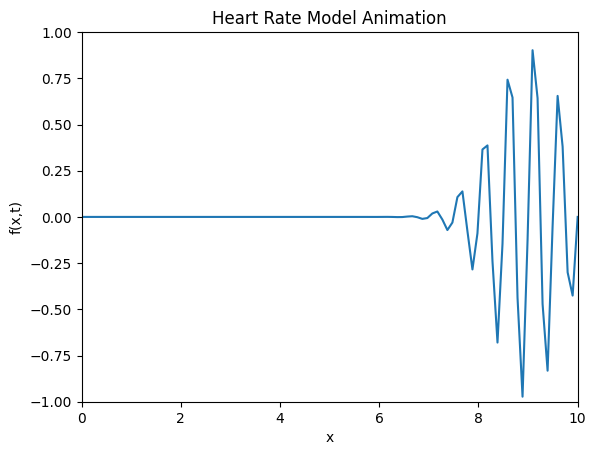

"This will create an animation.gif file in the data directory showing the wave function evolving over time, representing the patient's heart rate model.\nThe animation will show:\n        A wave packet moving from left to right\n        The amplitude modulated by the Gaussian envelope\n        Smooth transition between frames\n        Total duration of 3 seconds as specified in the time range\nThe resulting animation will help visualize how the heart rate model changes over both position (x) and time (t).\n"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from typing import List
import os

#create animation.py to define our function and animator
def f(x: np.array, t: np.array):
    """Define the f function
    Args:
        x: np.array - position values
        t: np.array - time value
    Return:
        The heart rate model function: e^(-(x-3t)²) * sin(4π(x-t))
    """
    return np.exp(-(x - 3*t)**2) * np.sin(4*np.pi*(x - t))

def animator(x: List, t: List, path: str, f: f) -> None:
    """
    Creates and saves an animation of the function f(x,t)
    Args:
        x: List containing [x_min, x_max]
        t: List containing [t_min, t_max]
        path: String path where to save the animation
        f: Function to animate
    """
    # Define x_min and x_max from x
    x_min, x_max = x[0], x[1]

    # Define t_min and t_max from t
    t_min, t_max = t[0], t[1]

    # Generate 100 values between x_min and x_max
    X = np.linspace(x_min, x_max, 100)

    # Generate 100 values between t_min and t_max
    t_values = np.linspace(t_min, t_max, 100)

    fig, axis = plt.subplots()

    axis.set_xlim([x_min, x_max])
    axis.set_ylim([-1, 1])

    # Add title
    axis.set_title("Heart Rate Model Animation")

    # Add y_label
    axis.set_ylabel("f(x,t)")

    # Add x_label
    axis.set_xlabel("x")

    animated_plot, = axis.plot([], [])

    def update_data(frame):
        """Define the update data function
        Args:
            frame: int - current frame number
        Returns:
            Tuple containing the updated plot
        """
        t = t_values[frame]

        # For each t, calculate the Y with respect to X
        Y = f(X, t)

        animated_plot.set_data(X, Y)
        return animated_plot,

    animation = FuncAnimation(fig=fig, func=update_data, frames=len(t_values),
                            interval=25, repeat=True)

    # Create directory if it doesn't exist (make data)
    os.makedirs(os.path.dirname(path), exist_ok=True)

    # Save the render using the path
    animation.save(path, writer='pillow')

    plt.show()

def main():
    animator(x = [0,10], t = [0,3], path = "data/animation.gif", f = f)

if __name__=="__main__":
    main()
"""This will create an animation.gif file in the data directory showing the wave function evolving over time, representing the patient's heart rate model.
The animation will show:
        A wave packet moving from left to right
        The amplitude modulated by the Gaussian envelope
        Smooth transition between frames
        Total duration of 3 seconds as specified in the time range
The resulting animation will help visualize how the heart rate model changes over both position (x) and time (t).
"""

# **EXERCICE 2 :**

In [2]:
import numpy as np

#features function to generate word embeddings
def features(dim: tuple):
    """Generate random values for each word (je, suis, très, malade)"""
    # Generate 4 random vectors of dimension dim
    X1 = np.random.randint(0, 255, dim)  # "je"
    X2 = np.random.randint(0, 255, dim)  # "suis"
    X3 = np.random.randint(0, 255, dim)  # "très"
    X4 = np.random.randint(0, 255, dim)  # "malade"

    # Stack vectors vertically to create feature matrix F
    F = np.vstack((X1, X2, X3, X4))

    return F

#query matrix function
def requêtes(dim_wq: tuple, F: np.array):
    """Calculate query matrix Q = W_q @ F^T"""
    # Generate random weight matrix W_q
    W_q = np.random.rand(*dim_wq)

    # Calculate Q = W_q @ F^T
    Q = W_q @ F.T

    return Q

#key matrix function
def clés(dim_wk: tuple, F: np.array):
    """Calculate key matrix K = W_k @ F^T"""
    # Generate random weight matrix W_k
    W_k = np.random.rand(*dim_wk)

    # Calculate K = W_k @ F^T
    K = W_k @ F.T

    return K


#value matrix function
def valeurs(dim_wv: tuple, F: np.array):
    """Calculate value matrix V = W_v @ F^T"""
    # Generate random weight matrix W_v
    W_v = np.random.rand(*dim_wv)

    # Calculate V = W_v @ F^T
    V = W_v @ F.T

    return V


#similarity calculation
def similarité(K: np.array, Q: np.array):
    """Calculate similarity matrix K^T @ Q"""
    # Calculate dot product K^T @ Q
    return K.T @ Q


#normalization function
def norm(d_k: int, similarité: np.array):
    """Normalize similarity matrix by sqrt(d_k)"""
    return similarité / np.sqrt(d_k)


#softmax function
def softmax(vector: np.array):
    """Apply softmax function to input vector with numerical stability
    Args:
        vector: np.array - input vector
    Returns:
        np.array - probability distribution after softmax
    """
    # Subtract max value for numerical stability
    shifted_vector = vector - np.max(vector)

    # Compute exponentials of shifted vector
    exp_vector = np.exp(shifted_vector)

    # Calculate sum of exponentials
    sum_exp = np.sum(exp_vector)

    # Calculate softmax probabilities
    return exp_vector / sum_exp


#attention weight matrix
def A(a_x1: np.array, a_x2: np.array, a_x3: np.array, a_x4: np.array):
    """Create attention weight matrix by stacking attention vectors"""
    # Stack attention vectors vertically
    return np.vstack((a_x1, a_x2, a_x3, a_x4))


def main():
    #Features matrix
    F = features(dim=(1,6))

    #Query matrix
    Q = requêtes(dim_wq=(3,6), F=F)

    #Keys matrix
    K = clés(dim_wk=(3,6), F=F)

    #V matrix
    V = valeurs(dim_wv=(4,6), F=F)

    #dot product matrix
    sim = similarité(K,Q)

    #Scaled dot product matrix

    sim_norm = norm(d_k = 3, similarité=sim)

    # Attention vector of x_1
    a_x1 = sim_norm[:,0]

    # Attention vector of x_2
    a_x2 = sim_norm[:,1]

    # Attention vector of x_3
    a_x3 = sim_norm[:,2]

    # Attention vector of x_4
    a_x4 = sim_norm[:,3]

    # softmax apply on x_1
    as_x1 = softmax(a_x1)

    # softmax apply on x_2
    as_x2 = softmax(a_x2)

    # softmax apply on x_3
    as_x3 = softmax(a_x3)

    # softmax apply on x_4
    as_x4 = softmax(a_x4)

    Attention = A(as_x1, as_x2 , as_x3, as_x4)


if __name__=="__main__":
    main()

#This implementation creates a complete self-attention mechanism for the given sentence "je suis très malade", following the transformer architecture principles.

# **EXERCICE 3 :**

In [3]:
# Initial parameters of the model
beta = 0.3
gamma = 0.1
S0 = 0.99
I0 = 0.01
R0 = 0.0
max_time = 100

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Union

#implement the SIR model function
def sir(S: float, I: float, R: float, time: int, sir_values: List[Tuple[float, float, float]]) -> None:
    """
    Recursive implementation of SIR model
    Args:
        S: proportion of susceptible population
        I: proportion of infected population
        R: proportion of recovered population
        time: current simulation time
        sir_values: list to store simulation values
    """
    # Base case: if max time reached or no more infected
    if time >= max_time or I <= 0:
        return

    # Calculate changes using SIR equations
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I

    # Update values
    new_S = S + dS
    new_I = I + dI
    new_R = R + dR

    # Store new values
    sir_values.append((new_S, new_I, new_R))

    # Recursive call with updated values
    sir(new_S, new_I, new_R, time + 1, sir_values)

def visualize(time: np.array, sir_values: np.array) -> None:
    """
    Visualize SIR model evolution
    Args:
        time: array of time points
        sir_values: array of (S,I,R) values at each time point
    """
    plt.figure(figsize=(10, 6))

    # Plot each population
    plt.plot(time, sir_values[:, 0], 'b-', label='Susceptible')
    plt.plot(time, sir_values[:, 1], 'r-', label='Infected')
    plt.plot(time, sir_values[:, 2], 'g-', label='Recovered')

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Population Proportion')
    plt.title('SIR Model Evolution')
    plt.legend()
    plt.grid(True)

    # Save the plot
    #plt.savefig('data/sir_model.png'), chemin de l'enregistrement du fichier
    plt.show()

"""
SIR Function:

    - Takes current S, I, R values and updates them using the differential equations
    - Uses recursive approach to simulate time evolution
    - Stops when either:
        Maximum time is reached
        No more infected population (I ≤ 0)
    - Uses the equations:
        dS/dt = -β⋅S⋅I
        dI/dt = β⋅S⋅I - γ⋅I
        dR/dt = γ⋅I

Visualization Function:

    - Creates a plot showing evolution of all three populations
    - Uses different colors for each population:
        Blue for Susceptible
        Red for Infected
        Green for Recovered
    - Includes grid, legend, and proper labels
"""

'\nSIR Function:\n\n    - Takes current S, I, R values and updates them using the differential equations\n    - Uses recursive approach to simulate time evolution\n    - Stops when either:\n        Maximum time is reached\n        No more infected population (I ≤ 0)\n    - Uses the equations:\n        dS/dt = -β⋅S⋅I\n        dI/dt = β⋅S⋅I - γ⋅I\n        dR/dt = γ⋅I\n\nVisualization Function:\n\n    - Creates a plot showing evolution of all three populations\n    - Uses different colors for each population:\n        Blue for Susceptible\n        Red for Infected\n        Green for Recovered\n    - Includes grid, legend, and proper labels\n'

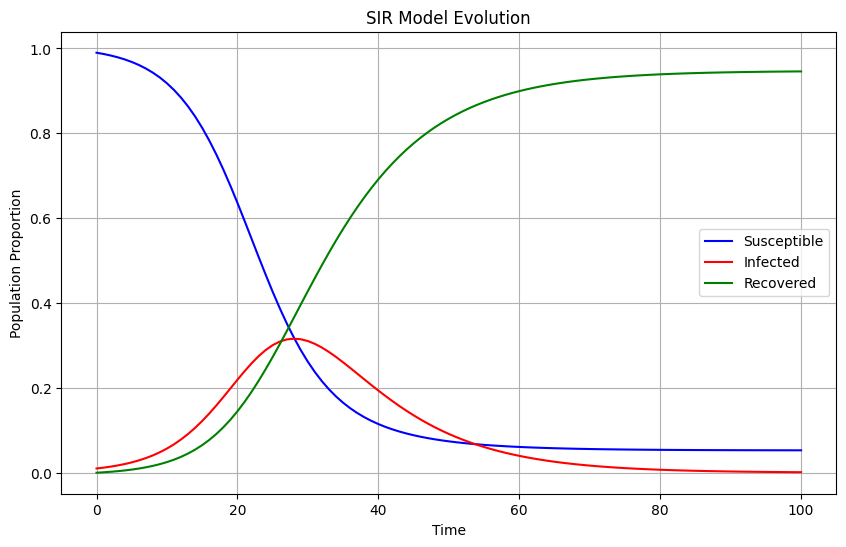

'\nThe simulation shows how:\n\n    - Susceptible population decreases as people get infected\n    - Infected population rises and then falls\n    - Recovered population gradually increases\n    - All curves follow typical epidemic behavior\n'

In [5]:
def main():
    # List for save results
    sir_values = [(S0, I0, R0)]

    # Launch the simulation
    sir(S0, I0, R0, 0, sir_values)

    #Generate len(sir_values) time
    time = np.arange(len(sir_values))

    #convert sir_values  into array
    sir_values = np.array(sir_values)

    #Draw the results
    visualize(time, sir_values)



if __name__=="__main__":
    main()

"""
The simulation shows how:

    - Susceptible population decreases as people get infected
    - Infected population rises and then falls
    - Recovered population gradually increases
    - All curves follow typical epidemic behavior
"""

# **EXERCICE 4 :**

In [6]:
import numpy as np

class Point:
    def __init__(self, x: float = 0, y: float = 0, z: float = 0):
        self.x = x
        self.y = y
        self.z = z

    def set_xyz(self, x: float, y: float, z: float) -> None:
        """Initialize robot coordinates"""
        self.x = x
        self.y = y
        self.z = z

    def deplace(self, dx: float, dy: float, dz: float, theta: float) -> None:
        """Move robot with rotation around Z-axis followed by translation"""
        # Rotation matrix around Z-axis
        R = np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]
        ])

        # Current position vector
        pos = np.array([self.x, self.y, self.z])

        # Translation vector
        trans = np.array([dx, dy, dz])

        # Apply rotation and translation
        new_pos = R @ pos + trans

        # Update position
        self.x, self.y, self.z = new_pos

In [7]:
from enum import IntEnum

class Direction(IntEnum):
    NORD = 1
    EST = 2
    SUD = 3
    OUEST = 4

class RobotC:
    def __init__(self, id: int, category: str):
        self.__id = id
        self.category = category
        self.orientation = Direction.NORD
        self.status = True
        self.position = Point()

    def getStatus(self) -> bool:
        """Get robot operational status"""
        return self.status

    def setOrientation(self, direction: Direction) -> None:
        """Set robot orientation"""
        self.orientation = direction

    @property
    def id(self) -> int:
        """Get robot ID"""
        return self.__id

In [8]:
class RobotCMobile(RobotC):
    def __init__(self, id: int):
        super().__init__(id, "Mobile")

    def avancer(self, distance: float = 1.0) -> None:
        """Move robot based on orientation"""
        if self.orientation == Direction.EST:
            self.position.x += distance
        elif self.orientation == Direction.OUEST:
            self.position.x -= distance
        elif self.orientation == Direction.NORD:
            self.position.y += distance
        elif self.orientation == Direction.SUD:
            self.position.y -= distance

In [9]:
#specialized robot classes:
class RobotSurveillance(RobotCMobile):
    def sendOrientation(self, other_robot: RobotCMobile) -> None:
        """Share orientation with another robot"""
        other_robot.setOrientation(self.orientation)

class RobotAccueil(RobotCMobile):
    def accueillir(self, visiteur: str) -> str:
        return f"Bienvenue {visiteur}!"

    def indiqueChemin(self, destination: str) -> str:
        return f"Pour aller à {destination}, suivez-moi."

    def prendreRendezVous(self, details: str) -> str:
        return f"Rendez-vous enregistré: {details}"

class RobotChirurgical(RobotC):
    def __init__(self, id: int):
        super().__init__(id, "Chirurgical")

    def preparerInstrument(self, instrument: str) -> None:
        print(f"Préparation de {instrument}")

    def suivreOperation(self) -> None:
        print("Suivi de l'opération en cours")

    def assisterChirurgien(self) -> None:
        print("Assistance au chirurgien")

class RobotNettoyage(RobotCMobile):
    def nettoyerZone(self, zone: str) -> None:
        print(f"Nettoyage de la zone {zone}")

    def decontaminer(self) -> None:
        print("Décontamination en cours")

In [10]:
def main():
    # Create array of 4 different robots
    robots = [
        RobotSurveillance(id=1),
        RobotAccueil(id=2),
        RobotChirurgical(id=3),
        RobotNettoyage(id=4)
    ]

    # 1. Surveillance Robot Demo
    surveillance_robot = robots[0]
    print("\n=== Démonstration Robot de Surveillance ===")
    # Change orientation and share with reception robot
    surveillance_robot.setOrientation(Direction.EST)
    surveillance_robot.sendOrientation(robots[1])
    print(f"Robot de surveillance orienté vers: {surveillance_robot.orientation.name}")
    print(f"Robot d'accueil orienté vers: {robots[1].orientation.name}")

    # 2. Reception Robot Demo
    reception_robot = robots[1]
    print("\n=== Démonstration Robot d'Accueil ===")
    print(reception_robot.accueillir("Dr. Martin"))
    print(reception_robot.indiqueChemin("Bloc Opératoire"))
    print(reception_robot.prendreRendezVous("Consultation Cardiologie - 14h"))

    # 3. Surgical Robot Demo
    surgical_robot = robots[2]
    print("\n=== Démonstration Robot Chirurgical ===")
    surgical_robot.preparerInstrument("Scalpel")
    surgical_robot.suivreOperation()
    surgical_robot.assisterChirurgien()

    # 4. Cleaning Robot Demo
    cleaning_robot = robots[3]
    print("\n=== Démonstration Robot de Nettoyage ===")
    # Move to different locations and clean
    cleaning_robot.setOrientation(Direction.NORD)
    cleaning_robot.avancer(2.0)
    cleaning_robot.nettoyerZone("Couloir")

    cleaning_robot.setOrientation(Direction.EST)
    cleaning_robot.avancer(1.0)
    cleaning_robot.nettoyerZone("Salle d'opération")
    cleaning_robot.decontaminer()

    # Display final positions
    print("\n=== Positions Finales des Robots ===")
    for robot in robots:
        print(f"Robot {robot.id} ({robot.category}) - Position: "
              f"x={robot.position.x:.1f}, y={robot.position.y:.1f}, z={robot.position.z:.1f}")

if __name__ == "__main__":
    main()


=== Démonstration Robot de Surveillance ===
Robot de surveillance orienté vers: EST
Robot d'accueil orienté vers: EST

=== Démonstration Robot d'Accueil ===
Bienvenue Dr. Martin!
Pour aller à Bloc Opératoire, suivez-moi.
Rendez-vous enregistré: Consultation Cardiologie - 14h

=== Démonstration Robot Chirurgical ===
Préparation de Scalpel
Suivi de l'opération en cours
Assistance au chirurgien

=== Démonstration Robot de Nettoyage ===
Nettoyage de la zone Couloir
Nettoyage de la zone Salle d'opération
Décontamination en cours

=== Positions Finales des Robots ===
Robot 1 (Mobile) - Position: x=0.0, y=0.0, z=0.0
Robot 2 (Mobile) - Position: x=0.0, y=0.0, z=0.0
Robot 3 (Chirurgical) - Position: x=0.0, y=0.0, z=0.0
Robot 4 (Mobile) - Position: x=1.0, y=2.0, z=0.0
